In [1]:
from soslib import funcs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

Please install CDO version 1.9.3 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo
Please install CDO version 1.9.3 or above: https://code.mpimet.mpg.de/projects/cdo/ or https://anaconda.org/conda-forge/cdo


Change dates here to impac the remainder. 

In [4]:
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'
radiosonde ='gucsondewnpnM1.b1'
sebs = 'gucsebsM1.b1'
start = '2023-01-01'
end = '2023-01-02' 

In [5]:
ds_radiosonde = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=radiosonde,
                                    startdate=start,
                                    enddate=end)


[DOWNLOADING] gucsondewnpnM1.b1.20230101.113000.cdf
                             
[DOWNLOADING] gucsondewnpnM1.b1.20230101.232600.cdf
                             


In [6]:
# Don't need to worry about this
kappa = 0.286
ds_radiosonde = ds_radiosonde.assign(potential_T = (273.15 + ds_radiosonde.where(ds_radiosonde['qc_tdry'] == 0)['tdry']) * (1000 / ds_radiosonde.where(ds_radiosonde['qc_tdry'] == 0)['pres'])**kappa - 273.15)
ds_radiosonde['potential_T'].attrs = {'units':'degC'}

ds_radiosonde = ds_radiosonde.assign(wspd_kt = (1.944 * ds_radiosonde.where(ds_radiosonde['qc_wspd'] == 0)['wspd']) )
ds_radiosonde['wspd_kt'].attrs = {'units':'kt'}

In [20]:
ds_sebs = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=sebs,
                                    startdate=start,
                                    enddate=end)

[DOWNLOADING] gucsebsM1.b1.20230101.000000.cdf
                             
[DOWNLOADING] gucsebsM1.b1.20230102.000000.cdf
                             


In [21]:
from datetime import datetime, timezone
import pytz

In [22]:
time_utc = ds_radiosonde['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
local_da=xr.DataArray.from_series(tz_corrected)
ds_radiosonde.coords.update({'local_time':tz_corrected})


In [23]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [24]:
radiosonde_400 = ds_radiosonde.where(ds_radiosonde['pres']>500, drop=True).to_dataframe().to_xarray()

radiosonde_400.attrs = ds_radiosonde.attrs
radiosonde_400.pres.attrs = ds_radiosonde.pres.attrs
radiosonde_400.potential_T.attrs = ds_radiosonde.potential_T.attrs
radiosonde_400.wspd_kt.attrs = ds_radiosonde.wspd_kt.attrs
radiosonde_400.deg.attrs = ds_radiosonde.deg.attrs

In [25]:
from matplotlib.dates import DateFormatter

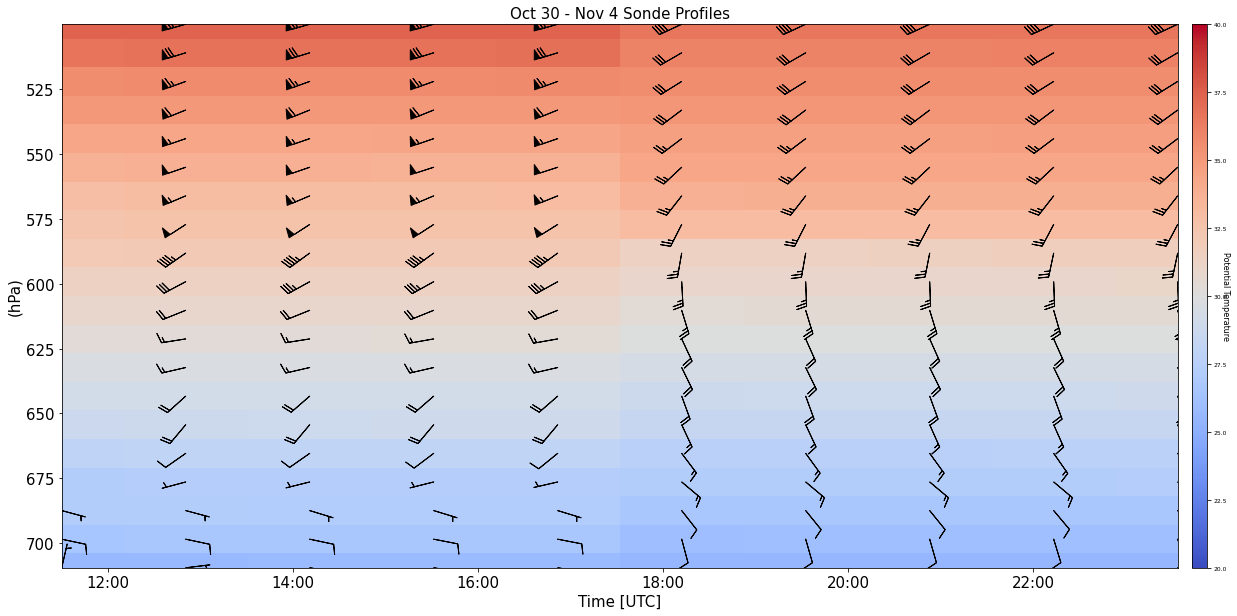

In [26]:

BarbDisplay = act.plotting.TimeSeriesDisplay(
    {'sonde_darwin': radiosonde_400}, figsize=(20, 10))
cax=BarbDisplay.plot_time_height_xsection_from_1d_data('potential_T', 'pres',
                                                   cmap='coolwarm',
                                                   vmin=20, vmax=40,
                                                   num_time_periods=10, 
                                                   cbar_label='Potential Temperature',
                                                   
                                                   )
BarbDisplay.plot_barbs_from_spd_dir('wspd_kt', 'deg', 'pres',
                                    num_barbs_x=10,
                                    num_barbs_y=20,
                                    set_title='Oct 30 - Nov 4 Sonde Profiles')                       
date_form = DateFormatter("%m-%d %H")

plt.show()


In [27]:
Y=radiosonde_400.pres.to_numpy()
X=radiosonde_400.time.to_numpy()

Text(0, 0.5, 'Distance above surface')

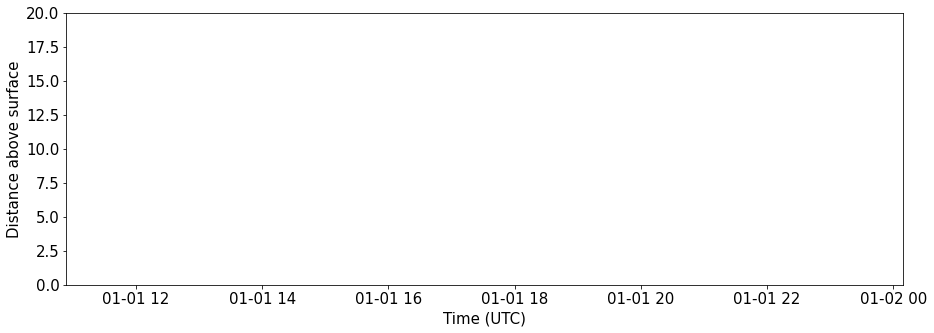

In [28]:
fig,ax = plt.subplots(figsize=(15,5))

# ax.pcolormesh(X,y3,df_tsnow.values.T,
#             cmap='coolwarm', vmin=-10, vmax=4)
ax.barbs(X,Y,radiosonde_400.u_wind.values.T*2.237, radiosonde_400.v_wind.values.T*2.237,
         length=7, 
         barb_increments={'half':1,
                        'full':5,
                        'flag':20})
ax.set_ylim(0,20)
ax.set_xlabel('Time (UTC)')   
ax.set_ylabel('Distance above surface')
# fig.colorbar(mesh, ax=ax, label='$\Theta_v$(C)')       

In [29]:
ecor = 'guc30ecorM1.b1'

ds_ecor = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=ecor,
                                    startdate=start,
                                    enddate=end)

[DOWNLOADING] guc30ecorM1.b1.20230101.000000.cdf
                             
[DOWNLOADING] guc30ecorM1.b1.20230102.000000.cdf
                             


In [30]:
met = 'gucmetM1.b1'

ds_met = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=met,
                                    startdate=start,
                                    enddate=end)

[DOWNLOADING] gucmetM1.b1.20230101.000000.cdf
                             
[DOWNLOADING] gucmetM1.b1.20230102.000000.cdf
                             


In [31]:
surf = 'gucgndirtM1.b1'

ds_surft = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=surf,
                                    startdate=start,
                                    enddate=end)

[DOWNLOADING] gucgndirtM1.b1.20230101.000000.nc
                             
[DOWNLOADING] gucgndirtM1.b1.20230102.000000.nc
                             


In [32]:
time_utc = ds_met['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
ds_met.coords.update({'local_time':tz_corrected})

In [33]:
time_utc = ds_surft['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
ds_surft.coords.update({'local_time':tz_corrected})

In [34]:
time_utc = ds_sebs['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
ds_sebs.coords.update({'local_time':tz_corrected})

In [35]:
time_utc = ds_ecor['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
local_da=xr.DataArray.from_series(tz_corrected)
ds_ecor.coords.update({'local_time':tz_corrected})

In [36]:
from matplotlib.dates import DateFormatter

In [37]:
ds_for_soil = ds_sebs.where((ds_sebs['qc_surface_soil_heat_flux_1']==0) & (ds_sebs['qc_surface_soil_heat_flux_2']==0) & (ds_sebs['qc_surface_soil_heat_flux_3']==0))
mean_soil_flux = (ds_for_soil.surface_soil_heat_flux_1 + ds_for_soil.surface_soil_heat_flux_2 + ds_for_soil.surface_soil_heat_flux_3)/3

123.53
143.02
292.66
295.82


(-700.0, 700.0)

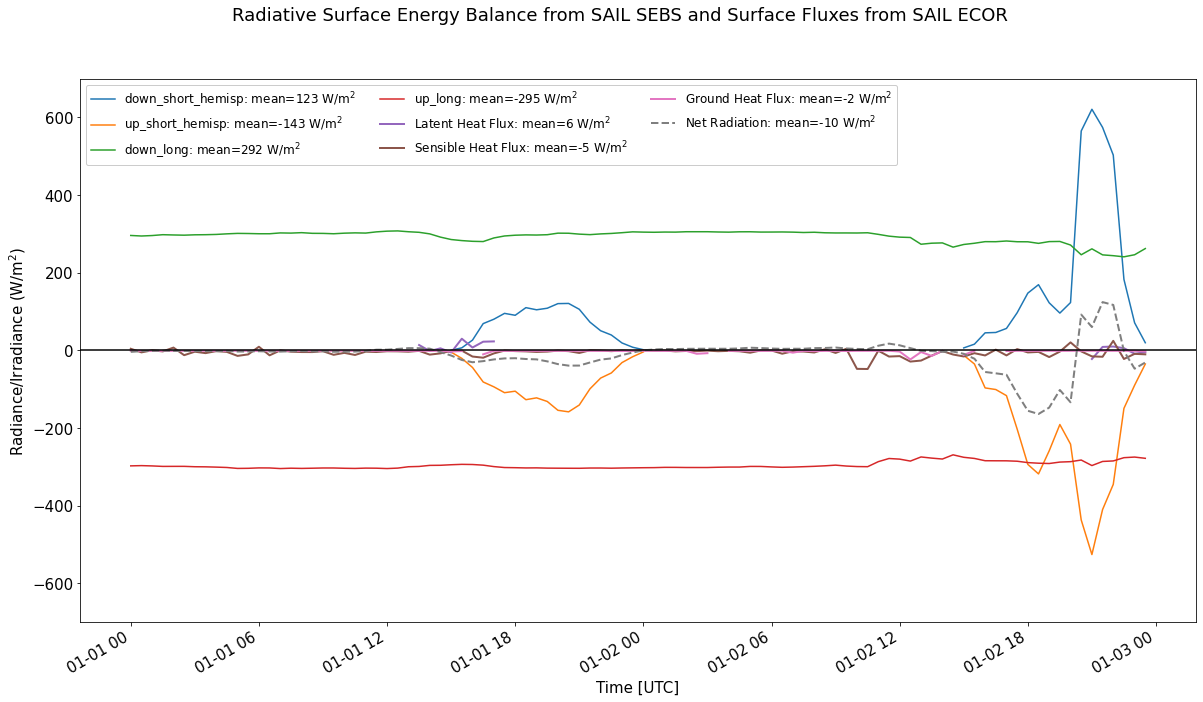

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

variables = ['down_short_hemisp','up_short_hemisp','down_long','up_long']
colors = ['r','o','b','g']
qc_variables =['qc_'+var for var in variables]
net = (ds_sebs[variables[0]] - ds_sebs[variables[1]]) + (ds_sebs[variables[2]] - ds_sebs[variables[3]])
formatter =DateFormatter('%m-%d %H')
for i,var in enumerate(variables):
    value = ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].mean().values.round(2)
    print(value)
    if 'up' in var:
        (-1*ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var]).plot(label=f'{var}: mean={-int(value)} W/m$^2$' )
    else:
        ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].plot(label=f'{var}: mean={int(value)} W/m$^2$' )

mean_lve = ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].mean()
mean_h = ds_ecor.where(ds_ecor['qc_h']==0)['h'].mean()

ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].plot(label=f'Latent Heat Flux: mean={int(mean_lve)} W/m$^2$', lw=2)
ds_ecor.where(ds_ecor['qc_h']==0)['h'].plot(label=f'Sensible Heat Flux: mean={int(mean_h)} W/m$^2$', lw=2)
(-1*mean_soil_flux).plot(label=f'Ground Heat Flux: mean={-int(mean_soil_flux.mean().values)} W/m$^2$', lw=2)
net.plot(label=f'Net Radiation: mean={int(net.mean().values)} W/m$^2$', lw=2, ls='--')


ax.axhline(0, color='k', ls='-')        
ax.legend(ncol=3,  framealpha=1)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Radiance/Irradiance (W/m$^2$)')
fig.suptitle('Radiative Surface Energy Balance from SAIL SEBS and Surface Fluxes from SAIL ECOR')
ax.set_xlabel('Time [UTC]')
ax.set_ylim(-700,700)
# ax.set_xlim(datetime(2022,10,31),datetime(2022,11,1))

In [41]:
time_utc = net['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
local_da=xr.DataArray.from_series(tz_corrected)
net.coords.update({'local_time':tz_corrected})

In [42]:
ds_met_30min = ds_met.resample(time='30min').mean()

In [43]:
time_utc = ds_met_30min['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
ds_met_30min.coords.update({'local_time':tz_corrected})

In [44]:
import metpy.calc as calc
from metpy.units import units

In [45]:
dew_pt_t = calc.dewpoint_from_relative_humidity(ds_met_30min['temp_mean']*units('celsius'),ds_met_30min['rh_mean']/100 )

In [46]:
time_utc = mean_soil_flux['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
mean_soil_flux.coords.update({'local_time':tz_corrected})

123.53
143.02
292.66
295.82


Text(0.5, 1.0, 'SAIL CEIL backscatter and SONDE winds')

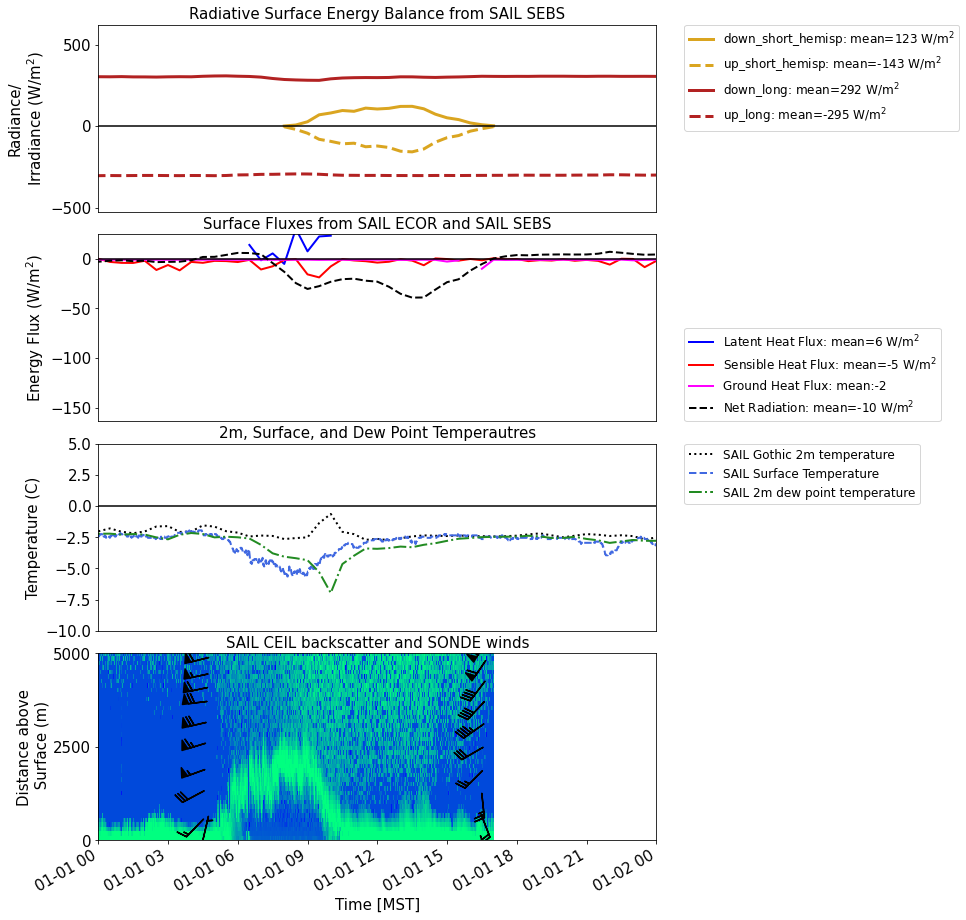

In [54]:
fig, axs = plt.subplots(nrows=4,figsize=(10,15),gridspec_kw={'hspace': 0.12, 'wspace': 0.1}, facecolor='white')

# Plot radiative surface energy balance
ax = axs[0]
variables = ['down_short_hemisp','up_short_hemisp','down_long','up_long']
colors = ['goldenrod','goldenrod','firebrick','firebrick']
qc_variables =['qc_'+var for var in variables]
net = (ds_sebs[variables[0]] - ds_sebs[variables[1]]) + (ds_sebs[variables[2]] - ds_sebs[variables[3]])
formatter =DateFormatter('%m-%d %H')
for i,var in enumerate(variables):
    value = ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].mean().values.round(2)
    print(value)
    if 'up' in var:
        (-1*ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var]).plot(x='local_time', label=f'{var}: mean={-int(value)} W/m$^2$',ax=ax, ls='--', lw=3, color=colors[i])
    else:
        ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].plot(x='local_time',label=f'{var}: mean={int(value)} W/m$^2$',ax=ax,lw=3, color=colors[i] )

ax.axhline(0, color='k', ls='-')        
ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Radiance/\nIrradiance (W/m$^2$)')
ax.set_title('Radiative Surface Energy Balance from SAIL SEBS')
ax.set_xlabel('')
ax.set_ylim((-1*ds_sebs.where(ds_sebs[qc_variables[1]]==0)[variables[1]]).min(),ds_sebs.where(ds_sebs[qc_variables[0]]==0)[variables[0]].max())
ax.set_xlim(datetime(2023,1,1), datetime(2023,1,2))
ax.set_xticks([])
ax.set_yticks([-500,0,500])

# Surface Fluxes
ax=axs[1]
# Mean values
mean_lve = ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].mean()
mean_h = ds_ecor.where(ds_ecor['qc_h']==0)['h'].mean()

ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].plot(x='local_time',label=f'Latent Heat Flux: mean={int(mean_lve)} W/m$^2$', lw=2, ax=ax, color='blue')
ds_ecor.where(ds_ecor['qc_h']==0)['h'].plot(x='local_time',label=f'Sensible Heat Flux: mean={int(mean_h)} W/m$^2$', lw=2, ax=ax, color='red')
(-mean_soil_flux).plot(label=f'Ground Heat Flux: mean:{-int(mean_soil_flux.mean().values)}', lw=2, ax=ax, color='magenta')
net.plot(x='local_time',color='k', label=f'Net Radiation: mean={int(net.mean().values)} W/m$^2$', lw=2, ls='--', ax=ax)

ax.axhline(0, color='k',)        
ax.legend(ncol=1, bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Energy Flux (W/m$^2$)')
ax.set_title('Surface Fluxes from SAIL ECOR and SAIL SEBS')
ax.set_ylim(net.min(),ds_ecor.where(ds_ecor['qc_lv_e']==0)['h'].max())
ax.set_xlabel('')
ax.set_xlim(datetime(2023,1,1), datetime(2023,1,2))
ax.set_xticks([])
ax.set_yticks([-100,0,50])

ax=axs[2]

ds_met_30min.where(ds_met_30min['qc_temp_mean']==0)['temp_mean'].plot(x='local_time',ax=ax, label='SAIL Gothic 2m temperature', ls='dotted',color='k', lw=2)
(ds_surft.where(ds_surft['qc_sfc_ir_temp']==0)['sfc_ir_temp']-273.15).plot(x='local_time', ax=ax, label='SAIL Surface Temperature', ls='--',color='royalblue', lw=2)
ax.plot(ds_met_30min.local_time, dew_pt_t, label='SAIL 2m dew point temperature',ls='-.',color='forestgreen', lw=2)


ax.axhline(0, color='k',)        
ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Temperature (C)')
ax.set_title('2m, Surface, and Dew Point Temperautres')
ax.set_xlabel('')
ax.set_xlim(datetime(2023,1,1), datetime(2023,1,2))
ax.set_ylim(-10,5)
ax.set_xticks([])


# Temperature, Surface Temperature, Dew Point Temperature
ax=axs[3]
n=100
c['backscatter'].plot.pcolormesh(x='local_time', y='range', cmap='winter', vmin=-1, vmax=2.5, add_colorbar=False, ax=ax)
ax.barbs(ds_radiosonde.local_time.to_numpy()[::n],(ds_radiosonde.alt.to_numpy()-2898.4)[::n],(ds_radiosonde.u_wind.T*1.944)[::n], (ds_radiosonde.v_wind.values.T*1.944)[::n],
         length=7,
         barbcolor='k',
         lw=1.5,
         fill_empty=True,
         )

ax.set_ylim(0,5000)
ax.set_xlim(datetime(2023,1,1), datetime(2023,1,2))
ax.set_ylabel('Distance above\n Surface (m)')
ax.set_xlabel('Time [MST]')
ax.set_yticks([0,2500,5000])
ax.set_title('SAIL CEIL backscatter and SONDE winds')

304.85
261.43
234.7
287.11


Text(0.5, 1.0, 'SAIL CEIL backscatter and SONDE winds')

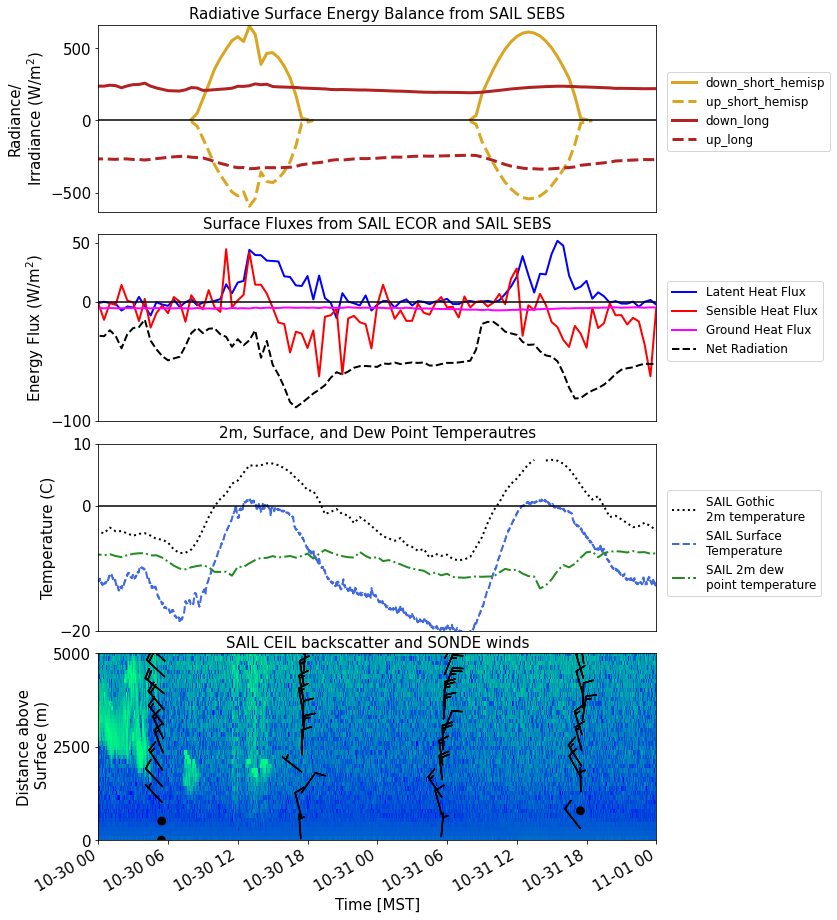

In [584]:
fig, axs = plt.subplots(nrows=4,figsize=(10,15),gridspec_kw={'hspace': 0.12, 'wspace': 0.1})

# Plot radiative surface energy balance
ax = axs[0]
variables = ['down_short_hemisp','up_short_hemisp','down_long','up_long']
colors = ['goldenrod','goldenrod','firebrick','firebrick']
qc_variables =['qc_'+var for var in variables]
net = (ds_sebs[variables[0]] - ds_sebs[variables[1]]) + (ds_sebs[variables[2]] - ds_sebs[variables[3]])
formatter =DateFormatter('%m-%d %H')
for i,var in enumerate(variables):
    value = ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].mean().values.round(2)
    print(value)
    if 'up' in var:
        (-1*ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var]).plot(x='local_time', label=f'{var}',ax=ax, ls='--', lw=3, color=colors[i])
    else:
        ds_sebs.where(ds_sebs[qc_variables[i]]==0)[var].plot(x='local_time',label=f'{var}',ax=ax,lw=3, color=colors[i] )

ax.axhline(0, color='k', ls='-')        
ax.legend(ncol=1, bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Radiance/\nIrradiance (W/m$^2$)')
ax.set_title('Radiative Surface Energy Balance from SAIL SEBS')
ax.set_xlabel('')
ax.set_ylim((-1*ds_sebs.where(ds_sebs[qc_variables[1]]==0)[variables[1]]).min(),ds_sebs.where(ds_sebs[qc_variables[0]]==0)[variables[0]].max())
ax.set_xlim(datetime(2022,10,30),datetime(2022,11,1))
ax.set_xticks([])
ax.set_yticks([-500,0,500])

# Surface Fluxes
ax=axs[1]
# Mean values
mean_lve = ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].mean()
mean_h = ds_ecor.where(ds_ecor['qc_h']==0)['h'].mean()

ds_ecor.where(ds_ecor['qc_lv_e']==0)['lv_e'].plot(x='local_time',label=f'Latent Heat Flux', lw=2, ax=ax, color='blue')
ds_ecor.where(ds_ecor['qc_h']==0)['h'].plot(x='local_time',label=f'Sensible Heat Flux', lw=2, ax=ax, color='red')
(-mean_soil_flux).plot(x='local_time',label=f'Ground Heat Flux', lw=2, ax=ax, color='magenta')
net.plot(x='local_time',color='k', label=f'Net Radiation', lw=2, ls='--', ax=ax)

ax.axhline(0, color='k',)        
ax.legend(ncol=1, bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Energy Flux (W/m$^2$)')
ax.set_title('Surface Fluxes from SAIL ECOR and SAIL SEBS')
ax.set_ylim(net.min(),ds_ecor.where(ds_ecor['qc_lv_e']==0)['h'].max())
ax.set_xlabel('')
ax.set_xlim(datetime(2022,10,30),datetime(2022,11,1))
ax.set_xticks([])
ax.set_yticks([-100,0,50])

ax=axs[2]

ds_met_30min.where(ds_met_30min['qc_temp_mean']==0)['temp_mean'].plot(x='local_time',ax=ax, label='SAIL Gothic \n2m temperature', ls='dotted',color='k', lw=2)
(ds_surft.where(ds_surft['qc_sfc_ir_temp']==0)['sfc_ir_temp']-273.15).plot(x='local_time', ax=ax, label='SAIL Surface\nTemperature', ls='--',color='royalblue', lw=2)
ax.plot(ds_met_30min.local_time, dew_pt_t, label='SAIL 2m dew\npoint temperature',ls='-.',color='forestgreen', lw=2)


ax.axhline(0, color='k',)        
ax.legend(ncol=1, bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0.)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Temperature (C)')
ax.set_title('2m, Surface, and Dew Point Temperautres')
ax.set_xlabel('')
ax.set_xlim(datetime(2022,10,30),datetime(2022,11,1))
ax.set_xticks([])
ax.set_yticks([-20,0,10])
ax.set_ylim(-20,10)

# Temperature, Surface Temperature, Dew Point Temperature
ax=axs[3]
n=100
c['backscatter'].plot.pcolormesh(x='local_time', y='range', cmap='winter', vmin=-1, vmax=2.5, add_colorbar=False, ax=ax)
ax.barbs(ds_radiosonde.local_time.to_numpy()[::n],(ds_radiosonde.alt.to_numpy()-2898.4)[::n],(ds_radiosonde.u_wind.T*1.944)[::n], (ds_radiosonde.v_wind.values.T*1.944)[::n],
         length=7,
         barbcolor='k',
         lw=1.5,
         fill_empty=True,
         )

ax.set_ylim(0,5000)
ax.set_xlim(datetime(2022,10,30), datetime(2022,11,1))
ax.set_ylabel('Distance above\n Surface (m)')
ax.set_xlabel('Time [MST]')
ax.set_yticks([0,2500,5000])
ax.set_title('SAIL CEIL backscatter and SONDE winds')

In [13]:
tsi = 'guctsiskycoverM1.b1'
ceil ='gucceilM1.b1'
# ds_tsi = funcs.get_sail_data(username=username,
#                                     token=token,
#                                     datastream=tsi,
#                                     startdate=start,
#                                     enddate=end)
ds_ceil = funcs.get_sail_data(username=username,
                                    token=token,
                                    datastream=ceil,
                                    startdate=start,
                                    enddate=end)

[DOWNLOADING] gucceilM1.b1.20230101.000000.nc
                             


In [14]:
ceilo_corrected  = act.corrections.ceil.correct_ceil(ds_ceil, -9999.)
# time_utc = ceilo_corrected['time'].to_index().tz_localize(pytz.UTC)
# us_mtn = pytz.timezone('US/Mountain')
# tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
# ceilo_corrected.coords.update({'local_time':tz_corrected})


invalid value encountered in log10


In [15]:
c = ceilo_corrected.coarsen(range=4, boundary='pad').mean()
c['backscatter'] =c['backscatter'].fillna(0)

time_utc = c['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
c.coords.update({'local_time':tz_corrected})

In [16]:
radiosonde_400['alt'] = radiosonde_400['alt']-2898.4

In [17]:
time_utc = radiosonde_400['time'].to_index().tz_localize(pytz.UTC)
us_mtn = pytz.timezone('US/Mountain')
tz_corrected = time_utc.tz_convert(us_mtn).tz_localize(None)
radiosonde_400.coords.update({'local_time':tz_corrected})

Text(0.5, 0, 'Time [MST]')

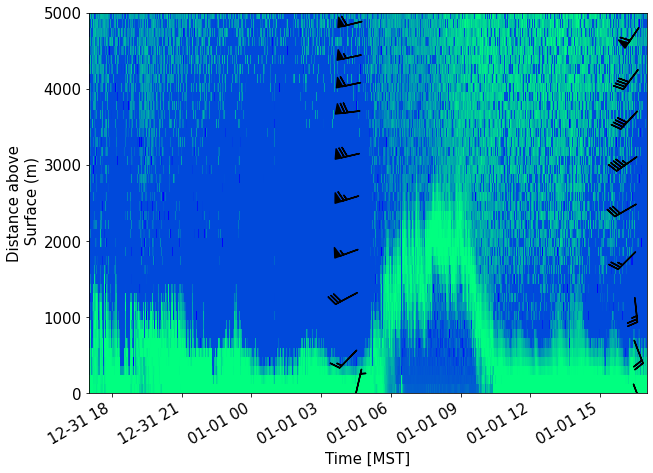

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
n=100
c['backscatter'].plot.pcolormesh(x='local_time', y='range', cmap='winter', vmin=-1, vmax=2.5, add_colorbar=False)
ax.barbs(ds_radiosonde.local_time.to_numpy()[::n],(ds_radiosonde.alt.to_numpy()-2898.4)[::n],(ds_radiosonde.u_wind.T*1.944)[::n], (ds_radiosonde.v_wind.values.T*1.944)[::n],
         length=7,
         barbcolor='k',
         lw=1.5,
         fill_empty=True,
         )

ax.set_ylim(0,5000)
# ax.set_xlim(datetime(2022,10,30), datetime(2022,11,1))
ax.set_ylabel('Distance above\n Surface (m)')
ax.set_xlabel('Time [MST]')

Text(0.5, -0.05, 'Radiosonde Potential Temperature Profile (C)')

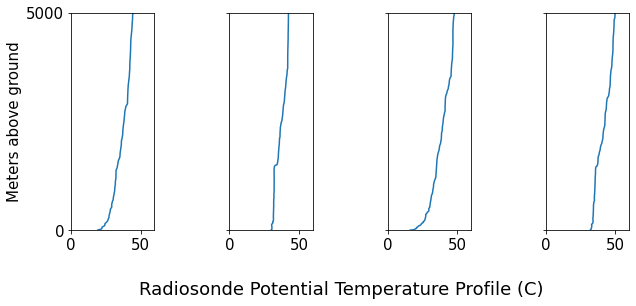

In [579]:
slices = [slice('2022-10-30 00','2022-10-30 12'),slice('2022-10-30 15','2022-10-31 00'),slice('2022-10-31 03','2022-10-31 12'),slice('2022-10-31 15','2022-11-01 03')]
fig, axs = plt.subplots(ncols=4,figsize=(10,4), sharey=True,gridspec_kw={'hspace': 0.1, 'wspace': 0.9})
axs[0].set_ylabel('Meters above ground')

for i,s in enumerate(slices):
    ax=axs[i]
    tmp_ds = ds_radiosonde.sel(time=s)

    ax.plot((tmp_ds.potential_T), (tmp_ds.alt.to_numpy()-2898.4),
            lw=1.5
            )
    ax.set_ylim(0,5000)
    ax.set_xlim(0,60)
axs[0].set_yticks([0,5000])
   


fig.suptitle('Radiosonde Potential Temperature Profile (C)',y=-0.05)